# 00 - Exploratory Data Analysis (EDA)

## Objetivo del Análisis

El objetivo de este EDA es comprender la estructura y comportamiento del dataset 
Amazon Sales antes de aplicar modelos de Machine Learning.

Este análisis permitirá:

- Detectar patrones relevantes.
- Identificar posibles outliers.
- Evaluar relaciones entre variables.
- Justificar la selección de modelos estadísticos posteriores.

Este EDA servirá como base para:

- Modelo 1: Regresión Lineal Bayesiana (predicción de ingresos).
- Modelo 2: Clasificador Bayesiano Best Seller.
- Modelo 3: Modelo Jerárquico por Región.


## 2. Carga del Dataset

Se carga el dataset original desde la carpeta data/raw.

Se utiliza Polars por su eficiencia en manejo de datos.

In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar dataset
df = pl.read_csv("../data/raw/amazon_sales_dataset.csv")

df.head()

order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
i64,str,i64,str,f64,i64,i64,str,str,f64,i64,f64,f64
1,"""2022-04-13""",2637,"""Books""",128.75,10,4,"""North America""","""UPI""",3.5,443,115.88,463.52
2,"""2023-03-12""",2300,"""Fashion""",302.6,20,5,"""Asia""","""Credit Card""",3.7,475,242.08,1210.4
3,"""2022-09-28""",3670,"""Sports""",495.8,20,2,"""Europe""","""UPI""",4.4,183,396.64,793.28
4,"""2022-04-17""",2522,"""Books""",371.95,15,4,"""Middle East""","""UPI""",5.0,212,316.16,1264.64
5,"""2022-03-13""",1717,"""Beauty""",201.68,0,4,"""Middle East""","""UPI""",4.6,308,201.68,806.72


## 3. Dimensiones y Estadísticas Básicas

Se analiza el tamaño del dataset y estadísticas descriptivas.

Esto permite:
- Detectar valores extremos.
- Identificar posibles inconsistencias.
- Evaluar dispersión de variables numéricas.

In [3]:
print("Shape:", df.shape)
df.describe()

Shape: (50000, 13)


statistic,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
str,f64,str,f64,str,f64,f64,f64,str,str,f64,f64,f64,f64
"""count""",50000.0,"""50000""",50000.0,"""50000""",50000.0,50000.0,50000.0,"""50000""","""50000""",50000.0,50000.0,50000.0,50000.0
"""null_count""",0.0,"""0""",0.0,"""0""",0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0
"""mean""",25000.5,null,2986.84874,null,252.50726,13.3407,2.9994,null,null,2.996316,249.32928,218.886566,657.331475
"""std""",14433.901067,null,1156.374535,null,143.025544,9.850694,1.415401,null,null,1.154295,144.251981,127.317681,526.223968
"""min""",1.0,"""2022-01-01""",1000.0,"""Beauty""",5.01,0.0,1.0,"""Asia""","""Cash on Delivery""",1.0,0.0,3.53,3.84
"""25%""",12501.0,null,1983.0,null,127.84,5.0,2.0,null,null,2.0,125.0,109.68,240.32
"""50%""",25001.0,null,2983.0,null,252.97,10.0,3.0,null,null,3.0,250.0,215.81,505.44
"""75%""",37500.0,null,3989.0,null,376.33,20.0,4.0,null,null,4.0,374.0,322.7,968.96
"""max""",50000.0,"""2023-12-31""",4999.0,"""Sports""",499.99,30.0,5.0,"""North America""","""Wallet""",5.0,499.0,499.91,2499.55


## 4. Distribución del Ingreso Total (total_revenue)

Se analiza la distribución del ingreso total para detectar:

- Asimetría (skewness).
- Concentración de valores.
- Posibles outliers.

Este análisis es clave para el Modelo 1 (regresión).

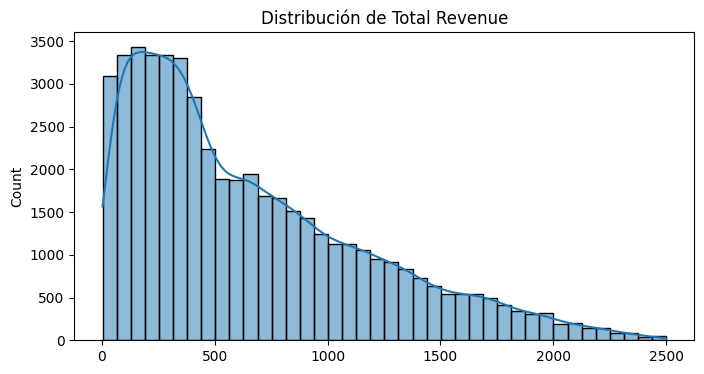

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(df["total_revenue"].to_numpy(), bins=40, kde=True)
plt.title("Distribución de Total Revenue")
plt.show()

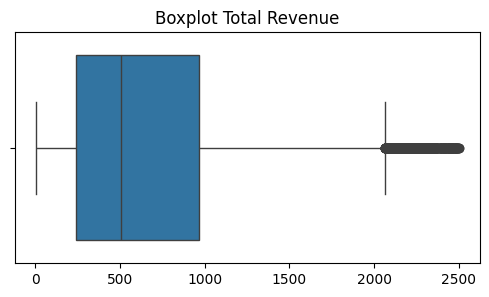

In [5]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["total_revenue"].to_numpy())
plt.title("Boxplot Total Revenue")
plt.show()

## 5. Distribución de Unidades Vendidas (quantity_sold)

Se analiza la variabilidad en ventas.

Esto es importante porque el Modelo 2 define
"Best Seller" en función de quantity_sold.

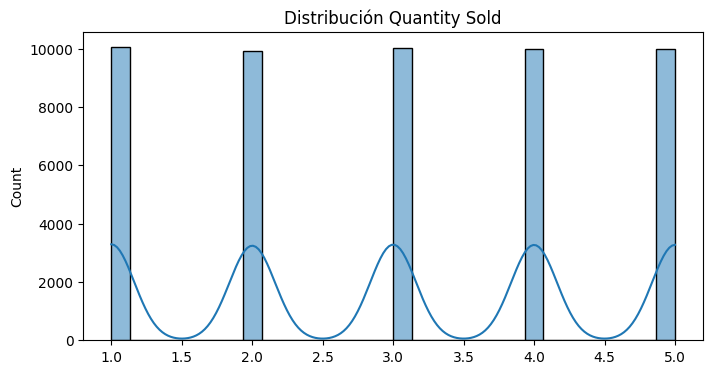

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df["quantity_sold"].to_numpy(), bins=30, kde=True)
plt.title("Distribución Quantity Sold")
plt.show()

## 6. Relación entre Precio con Descuento e Ingreso Total

Se analiza la relación entre discounted_price y total_revenue.

Esto permite evaluar si existe una relación lineal,
justificando el uso de modelos de regresión.

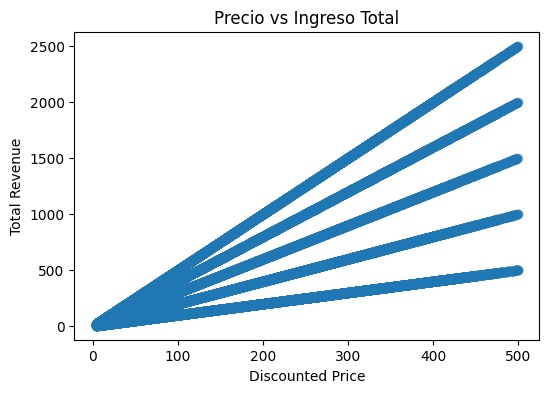

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(df["discounted_price"], df["total_revenue"], alpha=0.3)
plt.xlabel("Discounted Price")
plt.ylabel("Total Revenue")
plt.title("Precio vs Ingreso Total")
plt.show()

## 7. Relación entre Rating y Ventas

Se analiza si mejores calificaciones están asociadas
con mayores ventas.

Este análisis fundamenta el Modelo 2
(Clasificador Bayesiano de Best Seller).

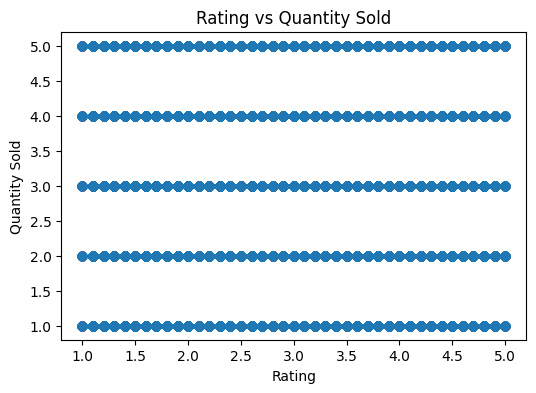

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(df["rating"], df["quantity_sold"], alpha=0.3)
plt.xlabel("Rating")
plt.ylabel("Quantity Sold")
plt.title("Rating vs Quantity Sold")
plt.show()

## 8. Matriz de Correlación

Se calcula la matriz de correlación entre variables numéricas
para identificar relaciones lineales significativas.

Interpretación:
- +1 → Relación positiva fuerte.
- 0 → Sin relación lineal.
- -1 → Relación negativa fuerte.

Este análisis ayuda a:
- Detectar multicolinealidad.
- Identificar variables predictoras relevantes.

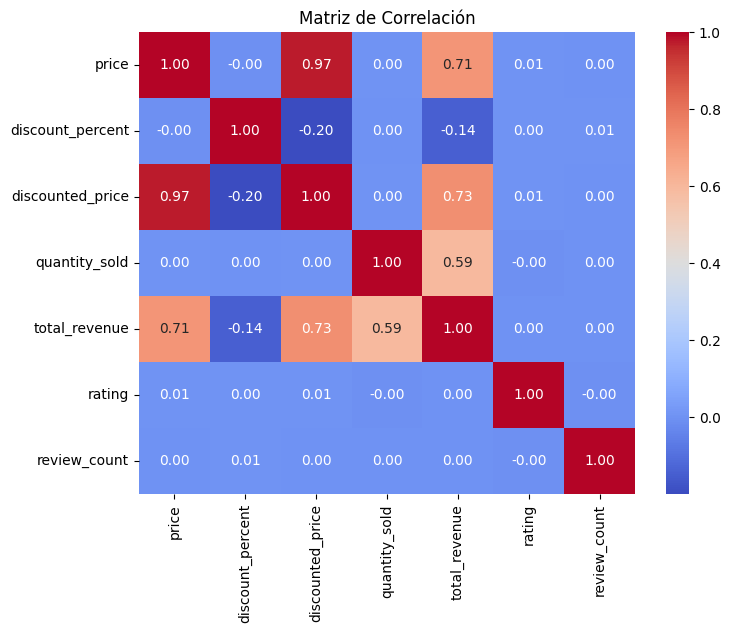

In [17]:
import numpy as np

df_num = df.select([
    "price",
    "discount_percent",
    "discounted_price",
    "quantity_sold",
    "total_revenue",
    "rating",
    "review_count"
])

corr_matrix = np.corrcoef(df_num.to_numpy(), rowvar=False)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    xticklabels=df_num.columns,
    yticklabels=df_num.columns,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Matriz de Correlación")
plt.show()

## 9. Análisis por Región

Se analizan diferencias promedio de ingresos y ventas por región.

Esto permite evaluar heterogeneidad geográfica,
justificando el Modelo 3 jerárquico.

In [18]:
region_summary = df.group_by("customer_region").agg(
    pl.mean("total_revenue").alias("avg_revenue"),
    pl.mean("quantity_sold").alias("avg_quantity")
)

region_summary

customer_region,avg_revenue,avg_quantity
str,f64,f64
"""North America""",661.278089,2.998642
"""Middle East""",663.882007,3.014314
"""Asia""",652.658457,2.988983
"""Europe""",651.486634,2.995663


## 10. Análisis por Categoría

Se evalúan diferencias de ingreso promedio por categoría de producto.

Esto permite identificar segmentos más rentables
y entender la estructura del mercado.

In [19]:
category_summary = df.group_by("product_category").agg(
    pl.mean("total_revenue").alias("avg_revenue")
)

category_summary.sort("avg_revenue", descending=True)

product_category,avg_revenue
str,f64
"""Home & Kitchen""",662.767323
"""Books""",658.684164
"""Electronics""",657.523321
"""Beauty""",655.714704
"""Fashion""",655.125325
"""Sports""",654.233009


# Conclusiones del EDA

1. total_revenue presenta asimetría positiva, indicando concentración
   de productos con ingresos moderados y algunos con ingresos altos.

2. Existe correlación positiva fuerte entre discounted_price
   y total_revenue, lo que respalda el uso de regresión lineal.

3. quantity_sold presenta alta variabilidad,
   justificando la definición de Best Seller basada en percentiles.

4. Se observan diferencias regionales en ingresos promedio,
   lo que fundamenta el uso de un modelo jerárquico.

5. rating muestra relación moderada con ventas,
   apoyando su inclusión como predictor en el Modelo 2.

Implicaciones:
- Modelo 1 es estadísticamente coherente.
- Modelo 2 tiene fundamento empírico.
- Modelo 3 responde a heterogeneidad regional.